## Questions
 What campgrounds allow tents? <BR />
 Which campgrounds only allow tents? <BR />

In [28]:
import os
os.getcwd()

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))

In [19]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

p = figure(title='simple line example', plot_height=300, plot_width=600, y_range=(-5,5))
r = p.line(x, y, color='#2222aa', line_width=3)

def update(f, w=1, A=1, phi=0):
    if f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

show(p, notebook_handle=True)

interact(update, f=["sin", "cos", "tan"], w=(0,100), A=(1,5), phi=(0, 20, 0.1))

Loading BokehJS ...

interactive(children=(Dropdown(description='f', options=('sin', 'cos', 'tan'), value='sin'), IntSlider(value=1…

<function __main__.update(f, w=1, A=1, phi=0)>

## Data

<p>This data is from a csv file pulled from <a href="https://www.kaggle.com/cypranowska/us-campsites" target="_blank">Kaggle</a>. The campsite types provided in the file are as follows:</p>

<h4>To begin - select "Run All" from the Cell menu.</h4>
<p>It can take 30 seconds to 1 minute to load the data and run all the cells. It is loading around 100,000 rows of campsite data.</p>
<table align="left" width="320" cellpadding="0" cellspacing="0" border="1" bordercolor="#cccccc">
    <tr>
        <td>STANDARD NONELECTRIC</td>
    </tr>
    <tr>
        <td>TENT ONLY NONELECTRIC</td>
    </tr>
    <tr>
        <td>RV NONELECTRIC</td>
    </tr>
    <tr>
        <td>WALK TO</td>
    </tr>
    <tr>
        <td>GROUP TENT ONLY AREA NONELECTRIC</td>
    </tr>
    <tr>
        <td>GROUP STANDARD NONELECTRIC</td>
    </tr>
    <tr>
        <td>EQUESTRIAN NONELECTRIC</td>
    </tr>
    <tr>
        <td>STANDARD ELECTRIC</td>
    </tr>
    <tr>
        <td>RV ELECTRIC</td>
    </tr>
    <tr>
        <td>GROUP STANDARD ELECTRIC</td>
    </tr>
    <tr>
        <td>GROUP WALK TO</td>
    </tr>
    <tr>
        <td>GROUP EQUESTRIAN</td>
    </tr>
    <tr>
        <td>CABIN NONELECTRIC</td>
    </tr>
    <tr>
        <td>CABIN ELECTRIC</td>
    </tr>
    <tr>
        <td>CABIN NONELECTRIC</td>
    </tr>
    <tr>
        <td>OVERNIGHT SHELTER ELECTRIC</td>
    </tr>
    <tr>
        <td>GROUP STANDARD AREA NONELECTRIC</td>
    </tr>
    <tr>
        <td>BOAT IN</td>
    </tr>
    <tr>
        <td>LOOKOUT</td>
    </tr>
</table>


<h3>Create All Table</h3>

In [19]:
conn = sqlite3.connect("USCampsitesDB.db")
c = conn.cursor()

sql_create = """
CREATE TABLE IF NOT EXISTS fedcampsites (
    ID INTERGER NOT NULL PRIMARY KEY UNIQUE,
    CampsiteID INTEGER,
    CampsiteName TEXT,
    CampsiteType INTEGER,
    FacilityID INTEGER,
    FacilityLatitude INTEGER,
    FacilityLongitude INTEGER,
    FacilityName TEXT,
    AddressStateCode TEXT,
    OrgAbbrevName INTEGER,
    FOREIGN KEY(type) REFERENCES tentcamp(type)
);
"""

# remove any data from a previous run
sql_delete = "DELETE FROM fedcampsites"

try:
    c.execute(sql_create)
    c.execute(sql_delete)
    conn.commit()
finally:
    conn.rollback()
    c.close()
    conn.close()

NameError: name 'sqlite3' is not defined

In [ ]:
<h3>Create Types Table</h3>

In [28]:
conn = sqlite3.connect("USCampsitesDB.db")
c = conn.cursor()

sql_create = """
CREATE TABLE IF NOT EXISTS tentcamp (
    type INTEGER PRIMARY KEY,
    name INTEGER,
    location TEXT    
);
"""

# remove any data from a previous run
sql_delete = "DELETE FROM tentcamp"

camp_insert_sql = """
INSERT INTO tentcamp
('type')
VALUES
('STANDARD NONELECTRIC'),
('TENT ONLY NONELECTRIC'),
('RV NONELECTRIC'),
('WALK TO'),
('GROUP TENT ONLY AREA NONELECTRIC'),
('GROUP STANDARD NONELECTRIC'),
('EQUESTRIAN NONELECTRIC'),
('STANDARD ELECTRIC'),
('RV ELECTRIC'),
('GROUP STANDARD ELECTRIC'),
('GROUP WALK TO'),
('GROUP EQUESTRIAN'),
('CABIN NONELECTRIC'),
('CABIN ELECTRIC'),
('CABIN NONELECTRIC'),
('OVERNIGHT SHELTER ELECTRIC'),
('GROUP STANDARD AREA NONELECTRIC'),
('BOAT IN'),
('LOOKOUT')
"""

try:
    c.execute(camp_create_sql)
    c.execute(camp_delete_sql)
    c.execute(camp_insert_sql)
    conn.commit()
finally:
    conn.rollback()
    c.close()
    conn.close()

NameError: name 'sqlite3' is not defined

In [29]:
conn = sqlite3.connect("USCampsitesDB.db")
conn.execute("VACUUM")

NameError: name 'sqlite3' is not defined

In [31]:
conn = sqlite3.connect("USCampsitesDB.db")
c = conn.cursor()
 
# List of camp data
tentcamp = ["STANDARD NONELECTRIC", "TENT ONLY NONELECTRIC", "RV NONELECTRIC", "WALK TO", "GROUP TENT ONLY AREA NONELECTRIC", 
            "GROUP STANDARD NONELECTRIC", "EQUESTRIAN NONELECTRIC", "STANDARD ELECTRIC", "RV ELECTRIC", "GROUP STANDARD ELECTRIC", 
            "GROUP WALK TO", "GROUP EQUESTRIAN", "CABIN NONELECTRIC", "CABIN ELECTRIC", "CABIN NONELECTRIC", 
            "OVERNIGHT SHELTER ELECTRIC", "GROUP STANDARD AREA NONELECTRIC", "BOAT IN", "LOOKOUT"]
            
printmd("### Loading Campsite Data...")

# load into sqlite table
for camp in tentcamp:
    filepath = 'csv/{}.csv'.format(camp)
        
    # add a new column 'camp' with the name
    df['name'] = camp
    
    # append the data to the 'tentcamp' table in the 'USCampsitesDB.db'
    df.to_sql("tentcamp", sqlite3.connect("USCampsitesDB.db"), if_exists = "append", index=False)
    
    # output the attraction
    print(f'- {camp} ({camp}.csv)')

NameError: name 'sqlite3' is not defined

Now let's visualize!

In [17]:
class TentSite:
    name_campsite = "Montana"
    
    def name_method(self):
        return self.name
    
new_instance = TentSite()
new_instance.name_method()

AttributeError: 'TentSite' object has no attribute 'name'

In [2]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [14]:
from bokeh.TentSite import Scatter
import pandas

df=pandas.DataFrame(columns=["FacilityLatitude","FacilityLongitude"])
df["FacilityLatitude"]=[]
df["FacilityLongitude"]=[]

p=Scatter(df, x="FacilityLatitude", y="FacilityLongitude", title="Campsite Location Layout", xlabel="Latitude", ylabel="Longitude")

ModuleNotFoundError: No module named 'bokeh.TentCharts'

In [15]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
            llcrnrlon=-130,urcrnrlon=-60,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lat = 30,31,34,33,32
lon = -103,-110,-107,-111,-115


lat2 = 40,33,44,31,30
lon2 = -113,-100,-102,-111,-112

x,y = m(lon,lat)
m.plot(x,y,'ro',markersize=20,alpha=.5)

x,y = m(lon2,lat2)
m.plot(x,y,'go',markersize=20,alpha=.5)

plt.title('Geo Plotting')
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

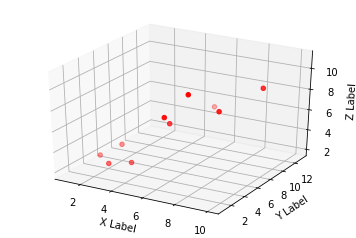

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [ ]:
plt.scatter(x="FacilityLatitude", y="FacilityLongitude", data=sites)